In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Load and prepare data, ML

In [7]:
df = pd.read_csv("datasets/btc.csv")

In [8]:
df

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,8.000000e+01
1,2010-07-19,0.1,0.1,0.1,0.1,5.700000e+02
2,2010-07-20,0.1,0.1,0.1,0.1,2.600000e+02
3,2010-07-21,0.1,0.1,0.1,0.1,5.800000e+02
4,2010-07-22,0.1,0.1,0.1,0.1,2.160000e+03
...,...,...,...,...,...,...
4989,2024-03-15,71387.9,72357.1,65630.7,69403.8,7.832045e+10
4990,2024-03-16,69392.5,70046.3,64801.4,65315.1,4.684220e+10
4991,2024-03-17,65316.3,68845.7,64545.3,68390.6,4.471686e+10
4992,2024-03-18,68371.3,68897.1,66594.2,67548.6,4.926158e+10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4994 non-null   object 
 1   Open    4994 non-null   float64
 2   High    4994 non-null   float64
 3   Low     4994 non-null   float64
 4   Close   4994 non-null   float64
 5   Volume  4988 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.2+ KB


In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,4994,4994.000000,4994.000000,4994.000000,4994.000000,4.988000e+03
mean,2017-05-18 12:00:00,10754.806948,11007.469644,10485.664638,10766.334381,1.179480e+10
min,2010-07-18 00:00:00,0.000000,0.100000,0.000000,0.100000,8.000000e+01
25%,2013-12-17 06:00:00,226.600000,231.200000,222.400000,226.900000,5.895000e+04
50%,2017-05-18 12:00:00,1871.600000,1954.500000,1825.050000,1909.250000,8.604240e+08
75%,2020-10-17 18:00:00,15285.850000,15834.225000,14329.425000,15321.950000,2.049945e+10
max,2024-03-19 00:00:00,73079.400000,73750.100000,71334.100000,73083.500000,3.509679e+11
std,NaN,15798.109822,16176.285768,15385.079733,15811.764818,1.785750e+10


In [12]:
df.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.759905,0.758447,0.762317,0.760078,0.676309
Open,0.759905,1.000000,0.999596,0.999301,0.999067,0.741821
High,0.758447,0.999596,1.000000,0.999180,0.999585,0.746189
Low,0.762317,0.999301,0.999180,1.000000,0.999506,0.733819
Close,0.760078,0.999067,0.999585,0.999506,1.000000,0.740652
Volume,0.676309,0.741821,0.746189,0.733819,0.740652,1.000000


In [13]:
df = df.dropna()

In [14]:
df

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,8.000000e+01
1,2010-07-19,0.1,0.1,0.1,0.1,5.700000e+02
2,2010-07-20,0.1,0.1,0.1,0.1,2.600000e+02
3,2010-07-21,0.1,0.1,0.1,0.1,5.800000e+02
4,2010-07-22,0.1,0.1,0.1,0.1,2.160000e+03
...,...,...,...,...,...,...
4989,2024-03-15,71387.9,72357.1,65630.7,69403.8,7.832045e+10
4990,2024-03-16,69392.5,70046.3,64801.4,65315.1,4.684220e+10
4991,2024-03-17,65316.3,68845.7,64545.3,68390.6,4.471686e+10
4992,2024-03-18,68371.3,68897.1,66594.2,67548.6,4.926158e+10


Text(0, 0.5, 'Close')

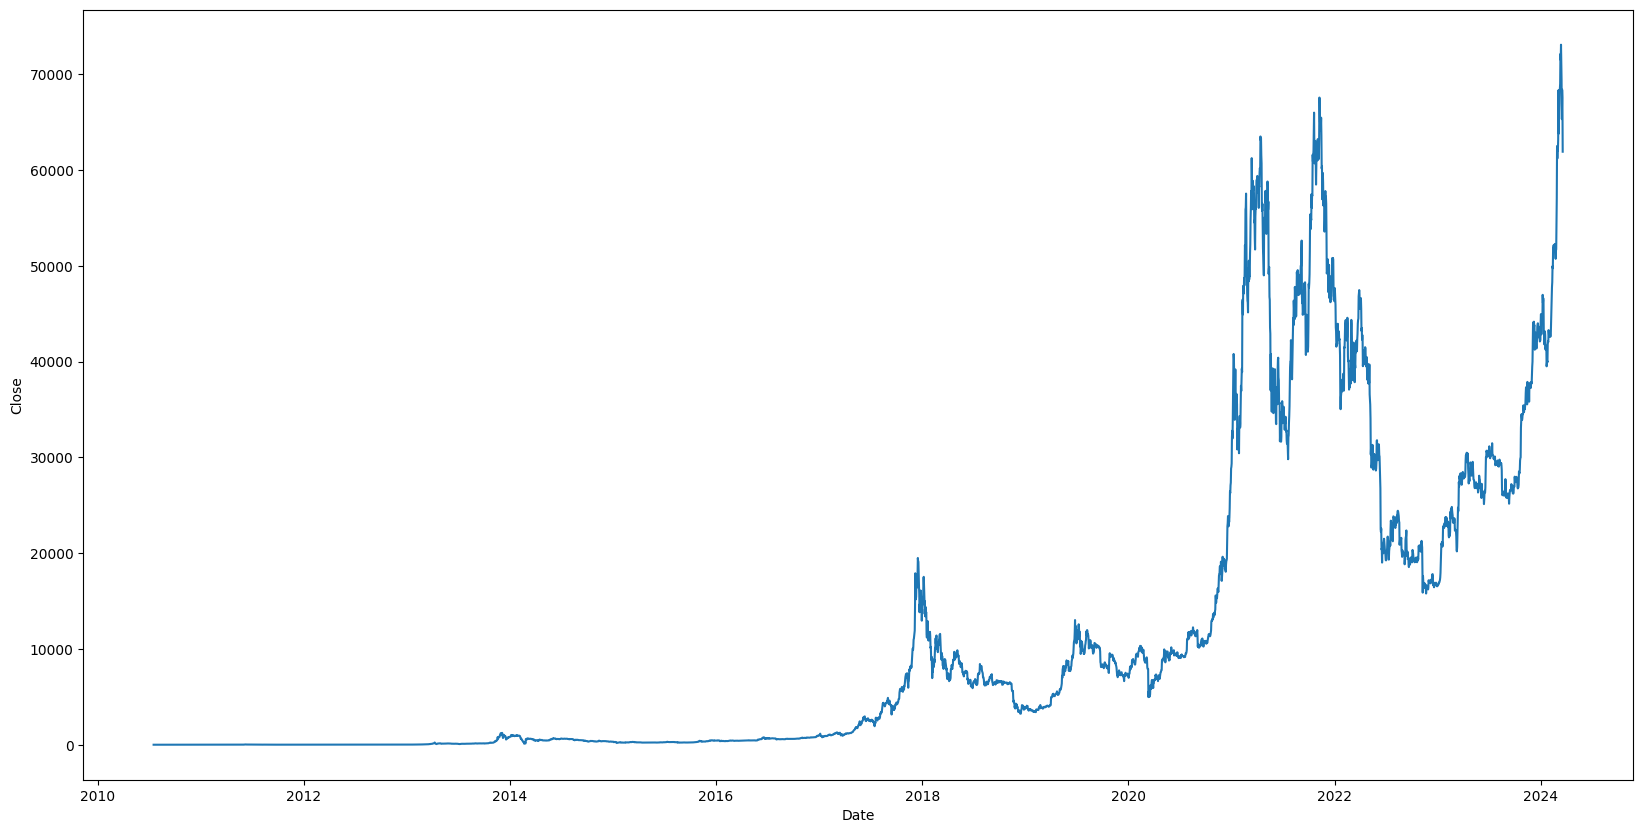

In [303]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Close")

Text(0, 0.5, 'Open')

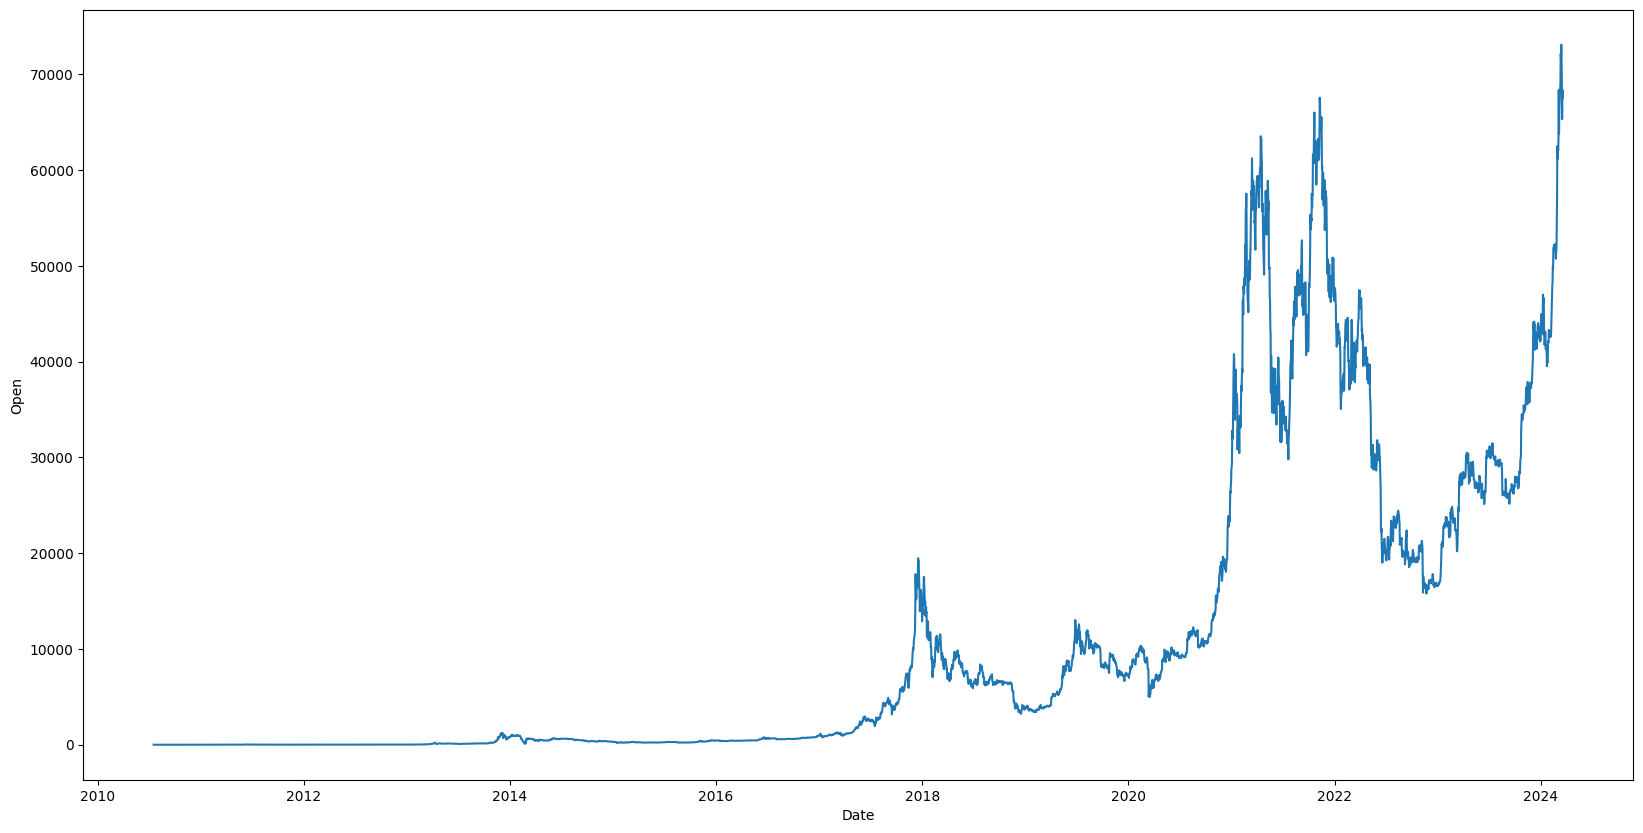

In [302]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"])
plt.xlabel("Date")
plt.ylabel("Open")

Text(0, 0.5, 'Volume')

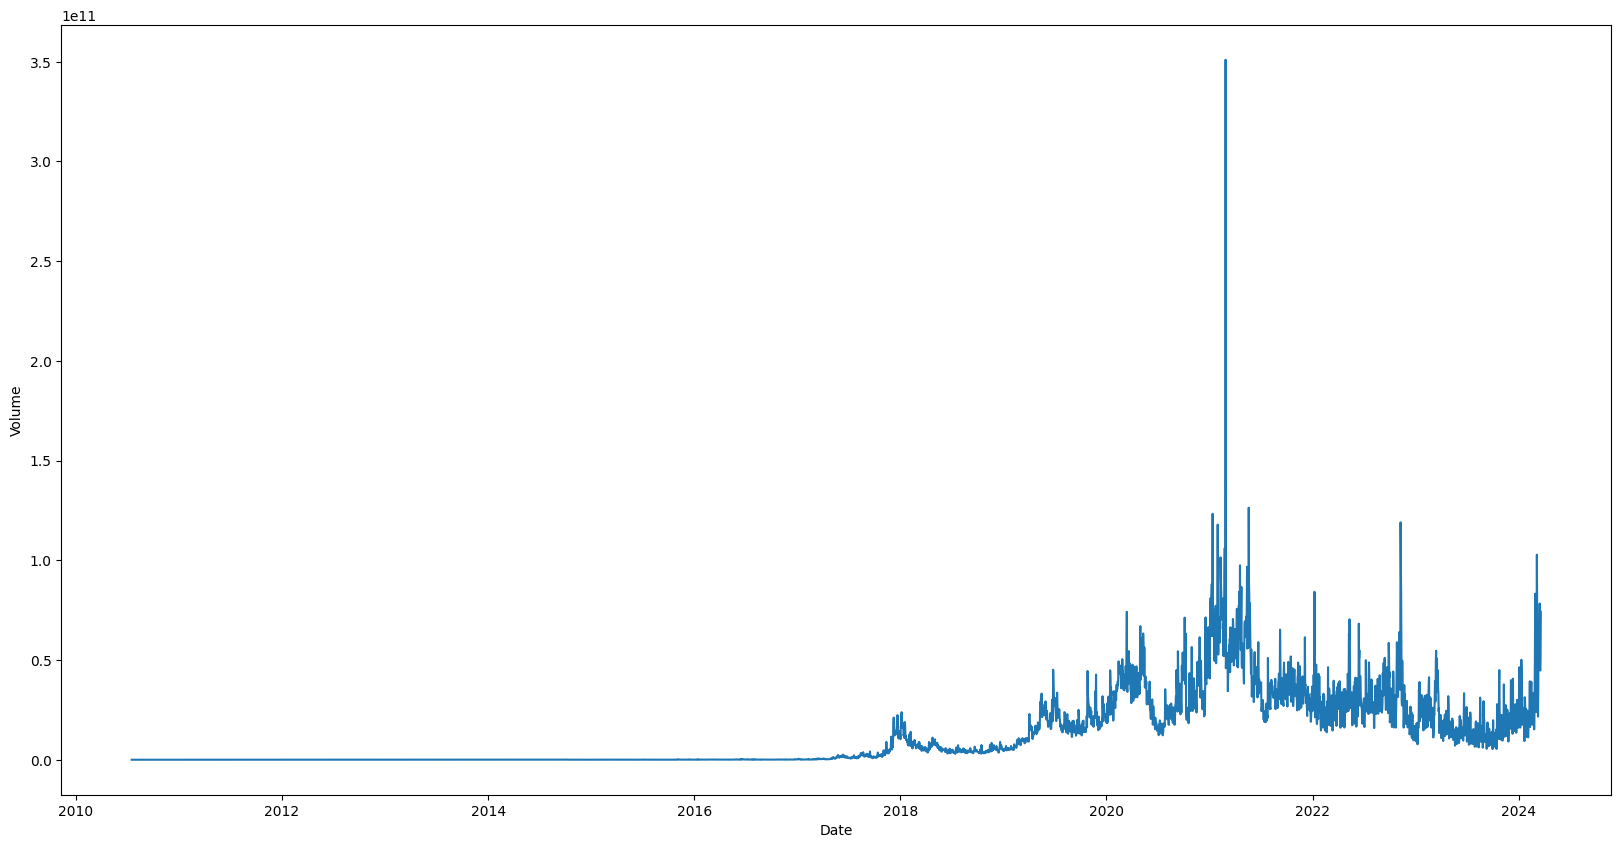

In [304]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")

In [18]:
X , y = df.drop(["Close", "Date"], axis=1), df["Close"]

In [19]:
X_train, X_test, y_train, y_test = X[:4200], X[4200:], y[:4200], y[4200:] 

In [20]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (4200, 4)
X_test shape (788, 4)
y_train shape (4200,)
y_test shape (788,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.score(X_test, y_test)

0.9988690898151009

In [24]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 132846.7322165953


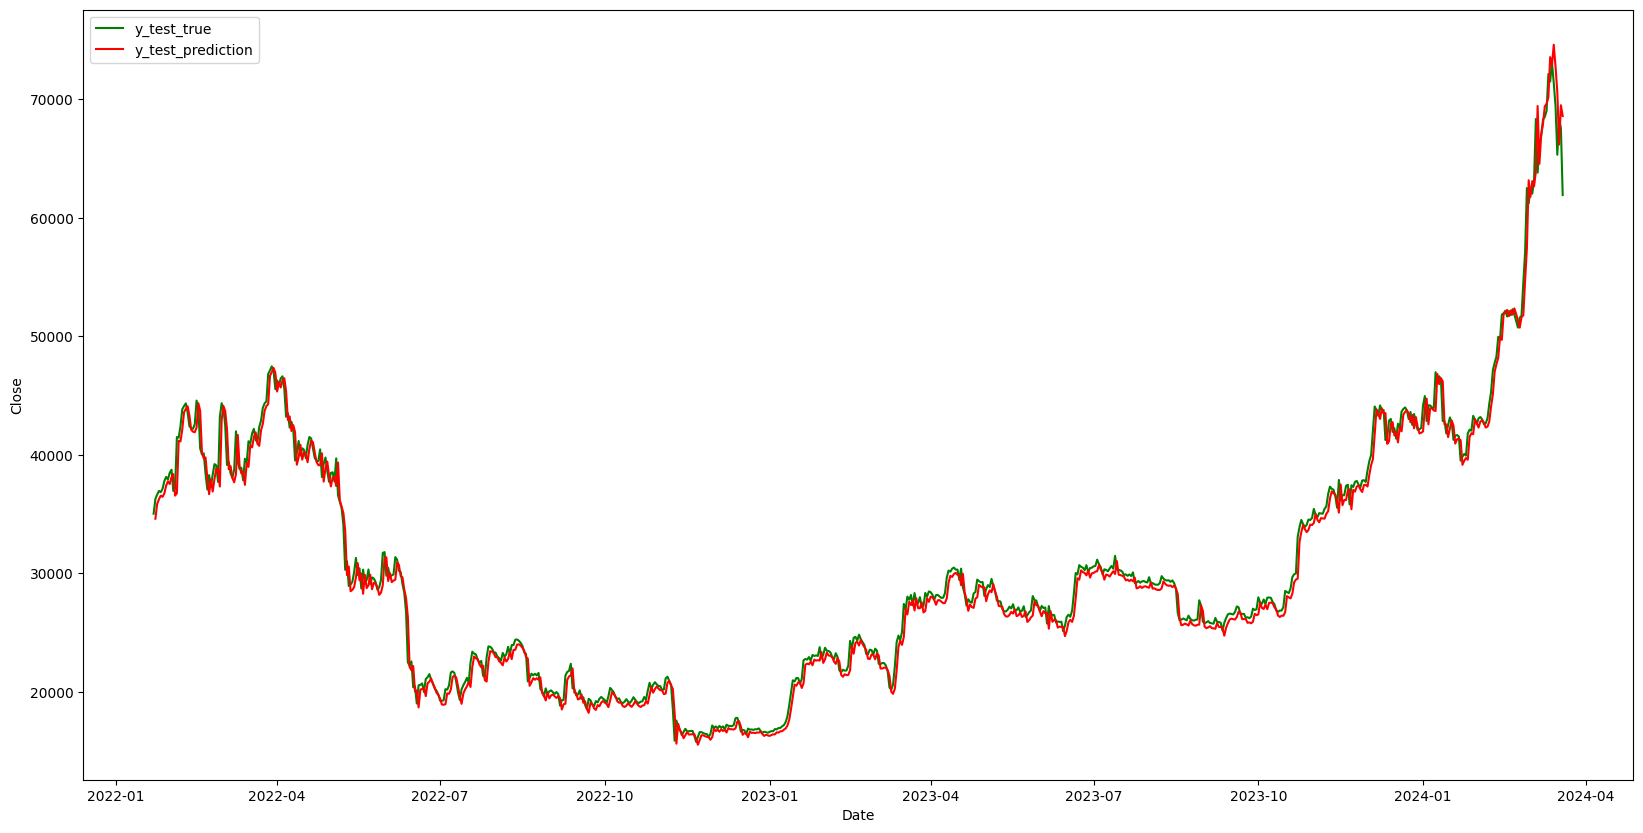

In [308]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"][4200:], y_test, label="y_test_true", c="g")
plt.plot(df["Date"][4201:], predictions, label="y_test_prediction", c="r")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
rfc.score(X_test, y_test)

0.9941096301490674

In [29]:
prediction_rfr = rfc.predict(X_test)
mse = mean_squared_error(y_test, prediction_rfr)
print('Mean Squared Error:', mse)

Mean Squared Error: 691935.0419621482


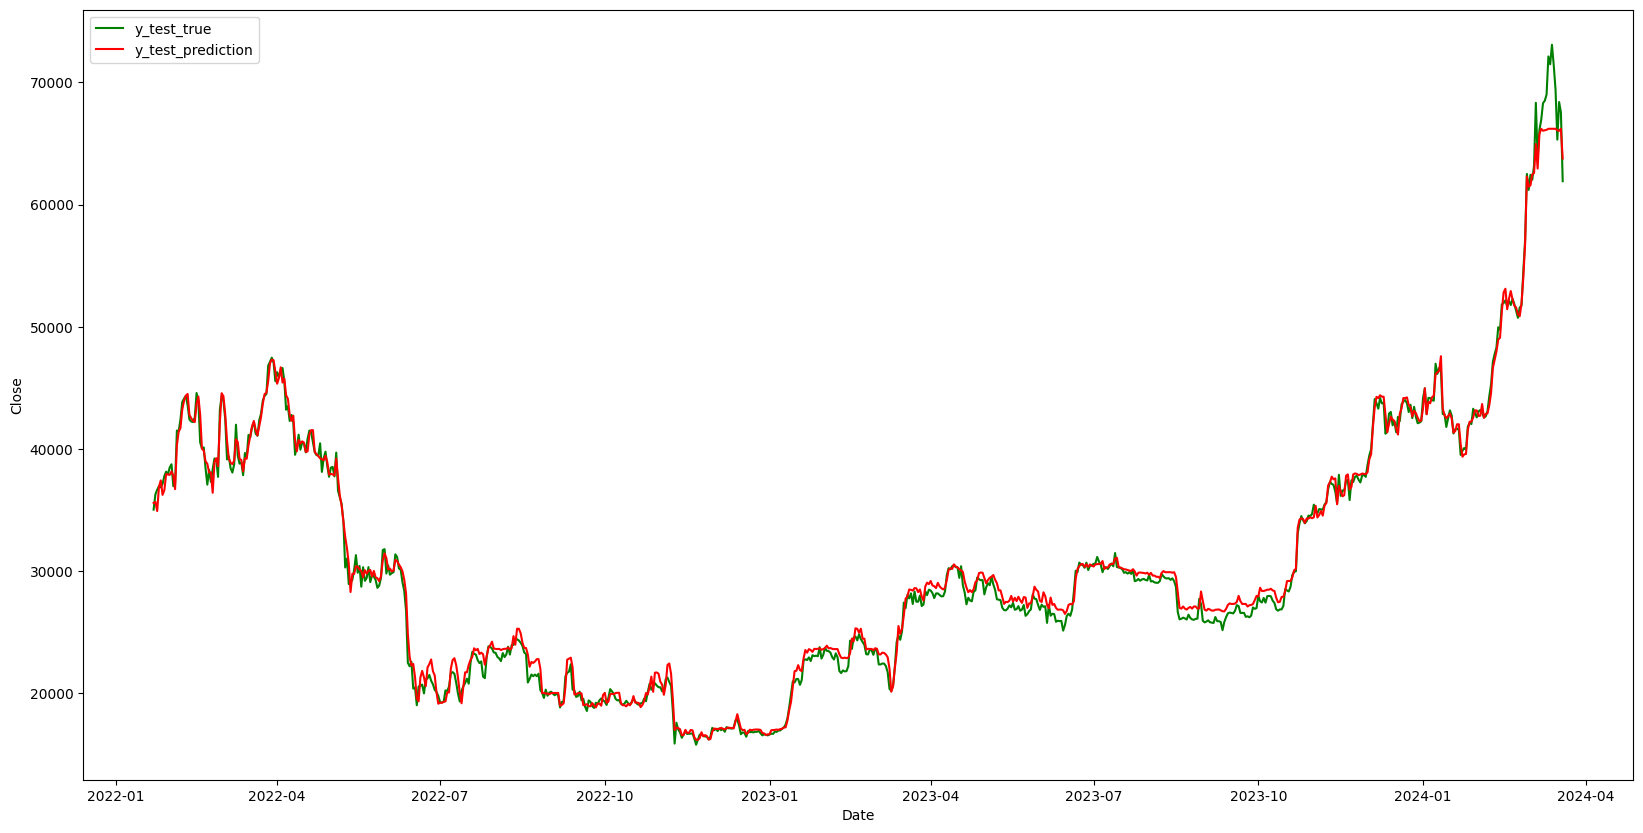

In [309]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"][4200:], y_test, label="y_test_true", c="g")
plt.plot(df["Date"][4200:], prediction_rfr, label="y_test_prediction", c="r")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()

In [31]:
# DL, scale data and reshape

In [236]:
from sklearn.preprocessing import MinMaxScaler

In [237]:
scaler = MinMaxScaler()

In [238]:
train_scaled = scaler.fit_transform(df["Close"][:4200].values.reshape(-1, 1))
test_scaled = scaler.transform(df["Close"][4200:].values.reshape(-1, 1))

In [239]:
X_train_nn = []
y_train_nn = []

for i in range( len(train_scaled) - 1):
    X_train_nn.append(train_scaled[i])
    y_train_nn.append(train_scaled[i+1])

In [240]:
X_test_nn = []
y_test_nn = []

for i in range(len(test_scaled) - 1):
    X_test_nn.append(test_scaled[i])
    y_test_nn.append(test_scaled[i+1])

In [241]:
X_train_nn, y_train_nn = np.array(X_train_nn), np.array(y_train_nn)
X_test_nn, y_test_nn = np.array(X_test_nn), np.array(y_test_nn)

In [242]:
X_train_nn = np.reshape(X_train_nn, (X_train_nn.shape[0], 1, X_train_nn.shape[1]))
X_test_nn = np.reshape(X_test_nn, (X_test_nn.shape[0], 1, X_test_nn.shape[1]))

In [243]:
X_train_nn

array([[[0.        ]],

       [[0.        ]],

       [[0.        ]],

       ...,

       [[0.62716545]],

       [[0.61782209]],

       [[0.60207617]]])

In [244]:
X_train_nn.shape

(4199, 1, 1)

In [284]:
from tensorflow import keras

In [285]:
model = keras.Sequential([
    keras.layers.LSTM(512, return_sequences=True, input_shape=(X_train_nn.shape[1], X_train_nn.shape[2]), activation='relu'),
    keras.layers.LSTM(256, return_sequences=False, activation='relu'),
    keras.layers.Dense(1)
])

In [286]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 1, 512)              │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 256)                 │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,840,385 (7.02 MB)

 Trainable params: 1,840,385 (7.02 MB)

 Non-trainable params: 0 (0.00 B)

In [288]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [289]:
history = model.fit(X_train_nn, y_train_nn, epochs=10, validation_split=0.1)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0022 - val_mae: 0.0372
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5586e-05 - mae: 0.0024 - val_loss: 8.4837e-04 - val_mae: 0.0215
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4139e-05 - mae: 0.0020 - val_loss: 8.0876e-04 - val_mae: 0.0210
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3642e-05 - mae: 0.0020 - val_loss: 9.3237e-04 - val_mae: 0.0226
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3473e-05 - mae: 0.0022 - val_loss: 8.4141e-04 - val_mae: 0.0213
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4666e-05 - mae: 0.0021 - val_loss: 7.8200e-04 - val_mae: 0.0208
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2045e-05 - mae: 0.0019 - val_loss: 7.9116e-04 - val_mae: 0.0209
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3394e-05 - mae: 0.0020 - val_loss: 8.5029e-04 - val_mae: 0.0215


In [310]:
y_pred = model.predict(y_test_nn)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Change it back (inverse transform)

In [311]:
predictions_dl = model.predict(X_test_nn)
predictions_dl = scaler.inverse_transform(predictions_dl)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


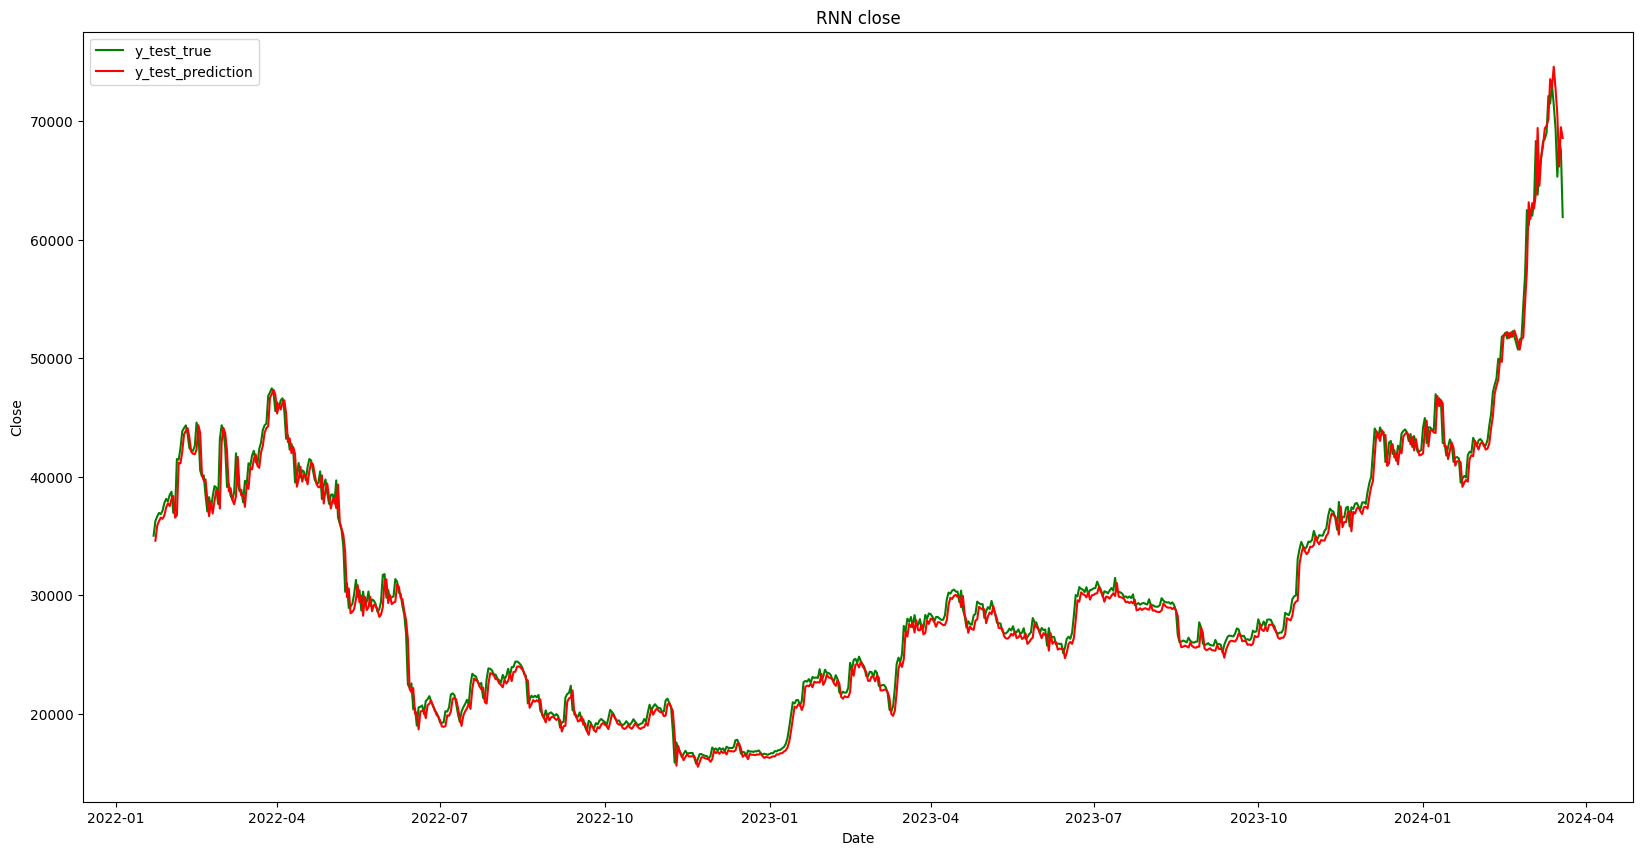

In [312]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"][4200:], y_test, label="y_test_true", c="g")
plt.plot(df["Date"][4201:], predictions_dl, label="y_test_prediction", c="r")
plt.title("RNN close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()